In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from sympy import *
from sympy.interactive import printing
from scipy.sparse import csr_matrix
printing.init_printing(use_latex=True)
from tabulate import tabulate

## $\frac{\partial\rho}{\partial t} + v \cdot \frac{\partial \rho}{\partial x} = 0$

## Range, Time Steps and Grids

In [3]:
dx = 1.0  #grid size
dt = 0.002   #time step
v = 100
t_range = [0, 4]  # time range
x_bound = [0, 400]  #spatial boundaries 
Nt = int(np.rint((t_range[1]-t_range[0])/dt))  #number of time step
Nx = int(np.rint((x_bound[1]-x_bound[0])/dx))  #number of grids

x, t = np.zeros(Nx+1), np.zeros(Nt+1)  #define the line space
for i in range(Nx+1):
    x[i] = x_bound[0] + i*dx

for n in range(Nt+1):
    t[n] = t_range[0] = n*dt


[0.000e+00 2.000e-03 4.000e-03 ... 3.996e+00 3.998e+00 4.000e+00]


## Numerical Solver

## Set Initial Condition

In [14]:
un = np.zeros(Nx+1)

In [15]:
un[0] = 1
un[1:50] = 0.5
un[50:] = 0

## Run the code (simulation)

In [16]:
d = v*dt/dx
u_s = []
for n in range(Nt):
    u_old = un.copy()
    for i in range(1, Nx):

        un[i] = -d*(u_old[i] - u_old[i-1]) + u_old[i]
    u_s.append(un.copy())

In [115]:
d = v*dt/dx

In [10]:
print(np.where(t==1))

(array([500]),)


## Plot

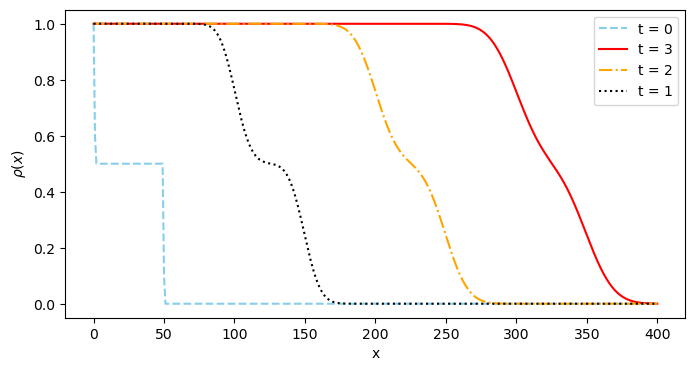

In [28]:
colors = ['skyblue',  'red', 'orange', 'black']
fig = plt.figure(figsize=(8,4))
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
plt.plot(x, u_s[0], color=colors[0], linestyle='dashed', label='t = 0')
plt.plot(x, u_s[1500], color=colors[1], linestyle='solid', label='t = 3')
plt.plot(x, u_s[1000], color=colors[2], linestyle='dashdot', label='t = 2')
plt.plot(x, u_s[500], color=colors[3], linestyle='dotted', label='t = 1')
plt.legend(loc = 'best')
plt.show()

## Describe and analysis

This scheme using here is forward differencing for time and backward differencing in space. This is actually an explicit scheme as we are actually using the know time step to iterate and get the unknown parameter, which is difference from implicit(using the unknown future e.g n+1 step). This scheme is unstable unless dt < dx/v. in our case, dx/v is 0.01, larger than dt, so it may be stable in our case.

From the graph, it show that $\rho(x)$ begin like a step function (discontinuous) at t = 0 and then expand out and become smoother. it is because for $\rho_1 > \rho_2$, the $\rho_1$ move faster than $\rho_2$, although the v is constant. The internal viscosity of this scheme spreads out quickly